<a href="https://colab.research.google.com/github/yuvasreekrishnan/codecraft/blob/main/naanmudhalvan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Error loading data: 'utf-8' codec can't decode byte 0xff in position 77: invalid start byte
Using sample data instead

DATASET INSIGHTS

Total Reviews: 10

Sentiment Distribution:
sentiment
positive    4
negative    3
neutral     3
Name: count, dtype: int64


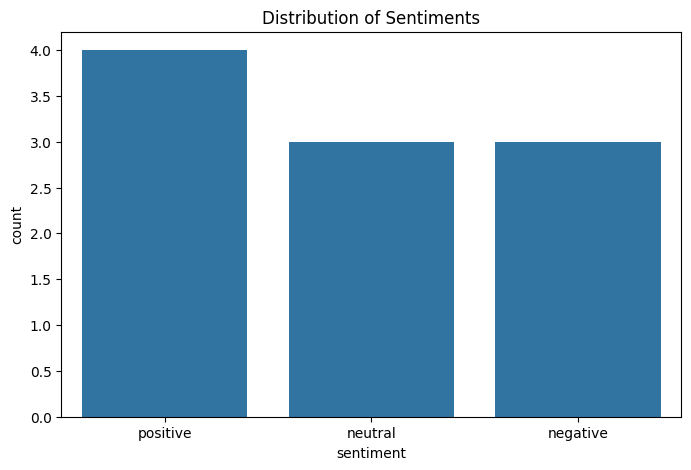


Word Clouds by Sentiment:


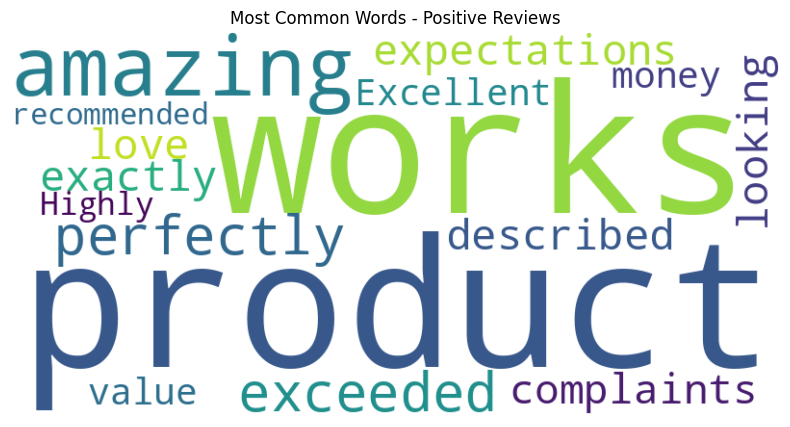

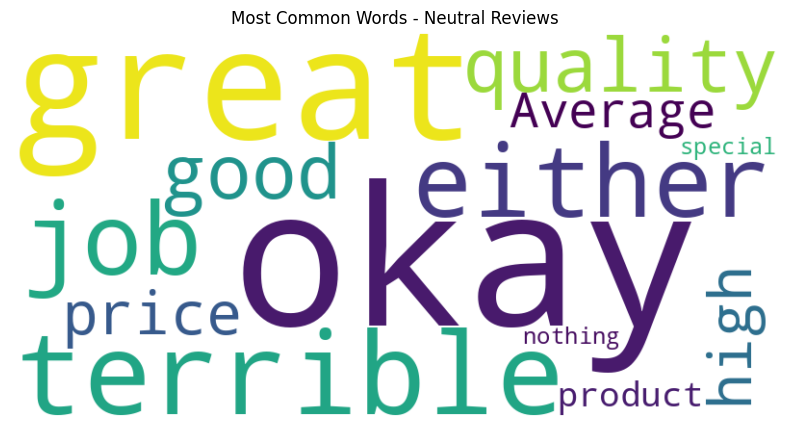

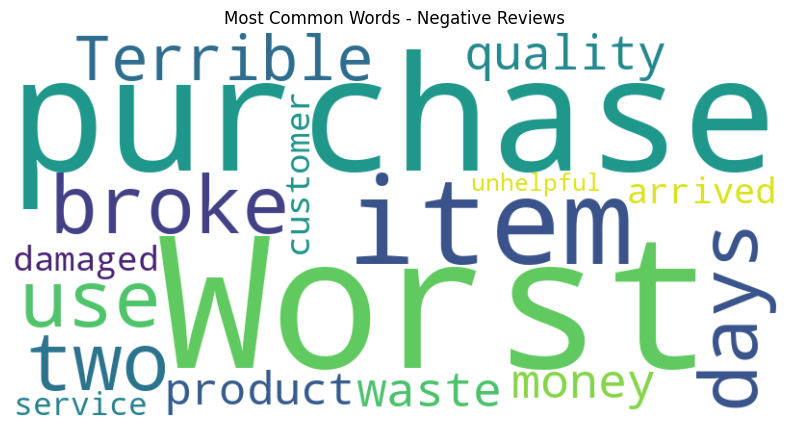


Review Length Analysis:


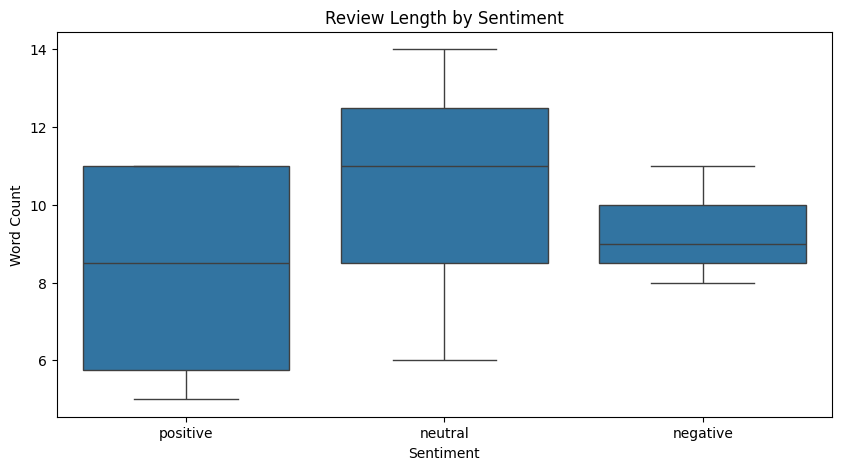


Average Review Length by Sentiment:
sentiment
negative     9.333333
neutral     10.333333
positive     8.250000
Name: review_length, dtype: float64
Error processing text: this product is amazing it works perfectly and exceeded my expectations
Error: 
**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt_tab/english/

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

Error processing text: worst purchase ever the item broke after two days of use
Error: 
********************

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [1]:
# Install required packages
!pip install numpy pandas matplotlib seaborn scikit-learn nltk wordcloud

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import re
import string
from wordcloud import WordCloud

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Text preprocessing function
def preprocess_text(text):
    try:
        # Convert to lowercase
        text = text.lower()

        # Remove punctuation
        text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)

        # Remove numbers
        text = re.sub(r'\d+', '', text)

        # Tokenize text
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

        # Join tokens back into string
        return ' '.join(tokens)
    except Exception as e:
        print(f"Error processing text: {text}")
        print(f"Error: {e}")
        return ""

# Function to load data from CSV file
def load_data(file_path):
    try:
        df = pd.read_csv(file_path)

        # Check if required columns exist
        if 'review' not in df.columns or 'sentiment' not in df.columns:
            raise ValueError("CSV file must contain 'review' and 'sentiment' columns")

        # Clean the data
        df = df.dropna(subset=['review', 'sentiment'])
        df['sentiment'] = df['sentiment'].str.lower().str.strip()
        valid_sentiments = ['positive', 'negative', 'neutral']
        df = df[df['sentiment'].isin(valid_sentiments)]

        if df.empty:
            raise ValueError("No valid data found after cleaning")

        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Function to generate insights
def generate_insights(df):
    print("\n" + "="*50)
    print("DATASET INSIGHTS")
    print("="*50)

    # Basic info
    print(f"\nTotal Reviews: {len(df)}")
    print("\nSentiment Distribution:")
    print(df['sentiment'].value_counts())

    # Sentiment distribution plot
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='sentiment', order=['positive', 'neutral', 'negative'])
    plt.title('Distribution of Sentiments')
    plt.show()

    # Word clouds for each sentiment
    print("\nWord Clouds by Sentiment:")
    sentiments = ['positive', 'neutral', 'negative']

    for sentiment in sentiments:
        text = ' '.join(df[df['sentiment'] == sentiment]['review'])
        if text:
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.title(f'Most Common Words - {sentiment.capitalize()} Reviews')
            plt.axis('off')
            plt.show()

    # Review length analysis
    df['review_length'] = df['review'].apply(lambda x: len(x.split()))
    print("\nReview Length Analysis:")

    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='sentiment', y='review_length', order=['positive', 'neutral', 'negative'])
    plt.title('Review Length by Sentiment')
    plt.ylabel('Word Count')
    plt.xlabel('Sentiment')
    plt.show()

    print("\nAverage Review Length by Sentiment:")
    print(df.groupby('sentiment')['review_length'].mean())

# Main function
def main():
    # Specify your CSV file path here
    csv_file_path = "/content/flipkart_product.csv.zip"  # Change this to your actual file path

    # Load data
    df = load_data(csv_file_path)
    if df is None:
        print("Using sample data instead")
        reviews = [
            ("This product is amazing! It works perfectly and exceeded my expectations.", "positive"),
            ("Worst purchase ever. The item broke after two days of use.", "negative"),
            ("It's okay, not great but not terrible either. Does the job.", "neutral"),
            ("The quality is good but the price is too high for what you get.", "neutral"),
            ("I love this product! It's exactly what I was looking for.", "positive"),
            ("Terrible quality. Don't waste your money on this.", "negative"),
            ("The product arrived damaged and customer service was unhelpful.", "negative"),
            ("Works as described. No complaints.", "positive"),
            ("Average product, nothing special about it.", "neutral"),
            ("Excellent value for money. Highly recommended!", "positive")
        ]
        df = pd.DataFrame(reviews, columns=['review', 'sentiment'])

    # Generate insights
    generate_insights(df)

    # Apply preprocessing
    df['cleaned_review'] = df['review'].apply(preprocess_text)

    # Split data
    X = df['cleaned_review']
    y = df['sentiment']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Vectorize text data
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    # Train model
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    model.fit(X_train_tfidf, y_train)

    # Evaluate model
    y_pred = model.predict(X_test_tfidf)

    print("\n" + "="*50)
    print("MODEL EVALUATION")
    print("="*50)
    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    plt.figure(figsize=(8,6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_,
                yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Interactive prediction
    print("\n" + "="*50)
    print("INTERACTIVE PREDICTION")
    print("="*50)
    print("Enter your own reviews to analyze sentiment (type 'exit' to quit)")

    while True:
        review = input("\nEnter a review: ")
        if review.lower() == 'exit':
            break

        result = predict_sentiment(model, tfidf_vectorizer, review)
        if result:
            print(f"\nReview: {result['review']}")
            print(f"Predicted Sentiment: {result['predicted_sentiment'].upper()}")
            print("Sentiment Probabilities:")
            print(f"  Positive: {result['sentiment_probabilities']['positive']:.2f}")
            print(f"  Neutral:  {result['sentiment_probabilities']['neutral']:.2f}")
            print(f"  Negative: {result['sentiment_probabilities']['negative']:.2f}")

# Function to predict sentiment
def predict_sentiment(model, vectorizer, review):
    try:
        # Preprocess the review
        cleaned_review = preprocess_text(review)

        # Vectorize the review
        review_tfidf = vectorizer.transform([cleaned_review])

        # Predict sentiment
        prediction = model.predict(review_tfidf)

        # Get prediction probabilities
        probabilities = model.predict_proba(review_tfidf)[0]

        return {
            'review': review,
            'predicted_sentiment': prediction[0],
            'sentiment_probabilities': {
                'negative': probabilities[model.classes_ == 'negative'][0],
                'neutral': probabilities[model.classes_ == 'neutral'][0],
                'positive': probabilities[model.classes_ == 'positive'][0]
            }
        }
    except Exception as e:
        print(f"Error predicting sentiment for: {review}")
        print(f"Error: {e}")
        return None

if __name__ == "__main__":
    main()